# Analiza podatkov

Zdaj ko so podatki pobrani in shranjeni v csv datoteki lahko pričnemo z analizo 1126 skladb, ki so bile v 1998 izdaji *Bach-Werke-Verzeichnis* .
Vse analitične funkcije so shranjene v datoteki `analiticne_funkcije.py` in jih tu samo kličemo.

**Opomba: podatki so nepopolni**  
 Veliko podatkov se je izgubilo ali uničilo v zadnjih 300 letih, kakšni še niso bili odkriti ali pa skladba preprosto nima teh podatkov (npr. inštrumentalna skladba ne bo imela odlomkov iz biblije).   
*Bach-Werke-Verzeichnis* se še do tega dneva dopolnjuje.

In [1]:
import pandas as pd
import analiticne_funkcije as af

bach = pd.read_csv("podatki_bach.csv", index_col="sifra")
pd.options.display.max_rows = 30
pd.set_option('display.max_colwidth', None)

Označbe v **BWV** niso vedno naravna števila, ampak imajo pogosto decimalno mesto. To je oznaka za različico iste skladbe, torej ko je Bach isto skladbo spremenil za različne namene in priložnosti (npr. posvetna kantata je postala cerkvena).  
Poiščimo BWV oznako z največ različicami:

In [2]:
af.najvec_razlicic()

0    36
Name: BWV, dtype: int64

Čeprav nobena skladba nima oznake BWV 36, so skladbe BWV 36.1 - 36.5 kantate. Tako je posvetna kantata BWV 36.1 "*Schwingt freudig euch empor*" postala cerkvena kantata BWV 36.4 in BWV 36.5 s istim naslovom.

Poglejmo povezavo med žanrom in številom različič. Pričakujemo, da bodo obsežna dela imela več različic, saj so bolj kompleksna in zahtevajo obširnejšo zasedbo.

In [3]:
af.razlicice_zanri()

d:\PODATKI MAJ\Studij - Matematika\Uvod_v_programiranje-1\Seminarska_naloga_končno\analiticne_funkcije.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_BWVzanr_dropna["BWV"] = bach_BWVzanr_dropna.BWV.astype(int).values.tolist()


,BWV,modus različic,povprečje različic
zanr,,,
Aria,200,1,1.000000
Cantata,249,4,1.000000
Chorale,"[250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, ...]",1,1.000000
Chorale cantata,"[4, 8, 80, 91, 130]",2,1.094340
Chorale setting,"[653, 660]",3,1.144828
Lied,"[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518]",1,1.000000
Magnificat,243,2,2.000000
Mass,"[232, 233]",2,1.222222
Motet,"[118, 225, 226, 227, 228, 229, 230]",1,1.000000


Naša pričakovanja so bila delno pravilna. Pasijon je vrsta oratorija (nekakšna opera z manj scenografskega spektakla), ki uglasbi Jezusove zadnje trenutke pred smrtjo kot so opisani v izbranem evangeliju, vsekakor zelo kompleksna glasbena oblika. Pasijon ima razumljivo tudi najvišje povprečje različic.

Kot smo že zgoraj videli, imajo posvetne kantate skladbo z največ različic in drugim najvišjim povprečjem. Bach je pisal posvetne kantate za razne dogodke kot so praznovanja, poroke, akademsko (za univerzo), zabava plemstva itd., skratka ni presenetljivo, da jih je predeloval, spreminjal in ponovno uporabil kako drugače.

Koliko kantat pa je napisal točno?

zanr
Chorale setting                                                 220
Work for keyboard instruments with or without pedal keyboard    220
Chorale                                                         191
Sacred cantata                                                  180
Music for organ                                                  90
Lied                                                             86
Chorale cantata                                                  59
Secular cantata                                                  36
Mass                                                             13
Passion                                                           9
Motet                                                             8
Cantata                                                           3
Oratorio                                                          3
Magnificat                                                        2
Aria                                       

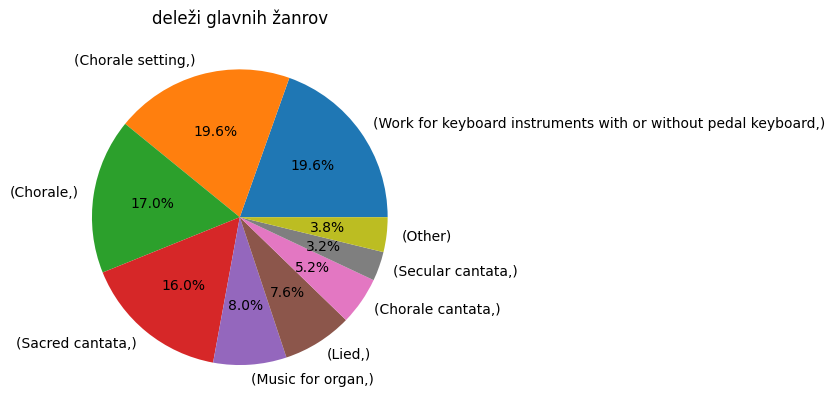

In [4]:
af.delezi_zanrov_plot()
af.skladbe_po_zanri()

Vidimo, da jih je napisal kar 259, od tega večino cerkvene. V Leipzigu je bil od leta 1723 do svoje smrti leta 1750 kapelnik in je tako vsako nedeljo izvedel cerkveno kantato, prva leta tam pa je eno napisal vsak teden.

"Chorale setting" je raznovrsten žanr, kjer je za glasbeno temo vzet koral, preprosta melodija liturgične enoglasne himne. Korali sami ne zaostajajo in tako vidimo globok vpliv cerkvenega življenja na Bachovo glasbo.

Izstopa tudi "delo za inštrumente s tipkami", za takratni čas čembalo in klavikord. Bachovo najbolj znano delo, priznano kot eno najbolj pomembnih del v zgodovini glasbe, sta dva zvezka *Das wohltemperierte Klavier* ("Dobro uglašen klavir"), kjer je za vsako lestvico spisal preludij in fugo, torej skupaj kar 96 skladb.

Koral kot liturgična himna ima poudarek na besedilu. Poglejmo koliko del vsebuje biblične odlomke:

In [5]:
af.skladbe_z_citati()

213

To je 1/6 skladb. Pričakujemo, da bodo pete cerkvene skladbe, predvsem korali in kantate, predstavljale večji delež te številke.

citati biblije,DA,NE
zanr,,
Aria,NaN,1.000000
Cantata,0.333333,0.666667
Chorale,NaN,1.000000
Chorale cantata,0.949153,0.050847
Chorale setting,NaN,1.000000
Lied,NaN,1.000000
Magnificat,NaN,1.000000
Mass,NaN,1.000000
Motet,NaN,1.000000


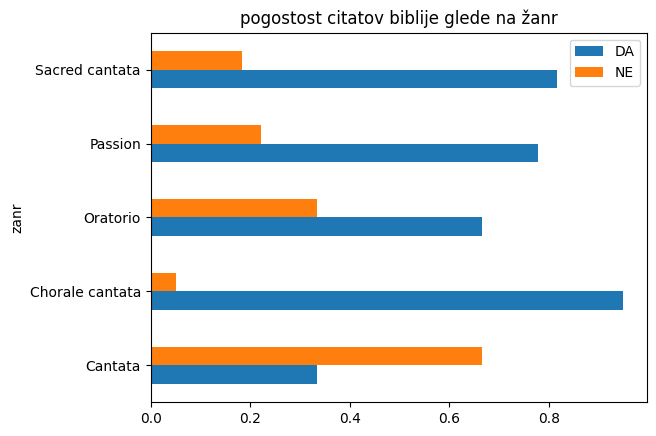

In [6]:
af.razmerje_citati_po_zanri_plot()
af.razmerje_citati_po_zanri()

Spet smo bili delno pravilni. Kantate imajo največji delež del z odlomki iz biblije, medtem ko jih korali kot taki sploh nimajo, četudi imajo liturgična besedila.  
Pasijon in oratorij pa črpata vsebino iz bibličnega materiala, zato nista presenetljiva.

Kantate z bibličnimi odlomki imajo striktno formo: najprej psalm, nato pismo in nazadnje evangelij. Poglejmo katera kombinacija odlomkov je najbolj prilubljena:

In [7]:
af.modus_odlomki_skupaj()

,psalm,pismo,evangelij
0,Psalm 12,"1. Korinther 5, 6-8","Markus 16, 1-8"


V Psalm 12 zbor prosi Gospoda naj pomaga, kajti ni več pobožnega in podlost je prišla nad človeške sinove.  
Pismo Korinčanom 5 , 6-8 je pridiga, naj ljudje od sebe "postrgajo stari kvas", torej greh, da bodo lahko praznovali z "nekvašenim kruhom iskrenosti in resnice".  
Nazadnje Markov evangelij 16, 1-8 opisuje kako Marija Magdalena, Marija mati Jakobova in Salome nakupijo in nesejo mazila k Jezusovem truplu, ampak najdejo prazen grob in angela, ki jim pove, da je On vstal.

Lahko razumemo, zakaj so te trije odlomki tako zelo priljubljeni skupaj. Vendar, kateri posamezni odlomki so najbolj priljubljeni?


In [8]:
af.modus_odlomki_posebej()

,psalm,pismo,evangelij
0,Psalm 12,"1. Korinther 5, 6-8","Markus 16, 1-8"


Resnično so to nasploh najbolj priljubljeni odlomki. Ali je kaj razlike v odlomkih med žanri?

In [9]:
af.modus_odlomki_po_zanru()

,psalm,pismo,evangelij
zanr,,,
Cantata,Psalm 110,"1. Korinther 5, 6-8","Markus 16, 1-8"
Chorale cantata,Psalm 12,"[1. Korinther 5, 6-8, Epheser 3, 13-21, Maleachi 3, 1-4, Offenbarung 12, 7-12, Offenbarung 14, 6-7, R&ouml;mer 11, 33-36, Titus 2, Vers 11&ndash;14]","[Johannes 3, 1-15, Lukas 2, 22-32, Lukas 2, Vers 1&ndash;14, Lukas 7, 11-17, Markus 16, 1-8, Matth&auml;us 11, 12-15, Matth&auml;us 18, 1-11]"
Oratorio,"[Psalm 110, Psalm 32]","[1. Korinther 5, 6-8, Apostelgeschichte 1, 1-11]","[Markus 16, 1-8, Markus 16, 14-20]"
Passion,Psalm 22,Jesaja 53,Johannes 18-19
Sacred cantata,Psalm 12,"Apostelgeschichte 2, 1-13","Johannes 14, 23-31"


Ugibam, da so razlike med odlomki najverjetneje zaradi različnih namenov oziroma vsebin. Cerkvene kantate so izvajane vsako nedeljo cerkveni skupnosti. Pasijoni in oratoriji pa imajo zaključeno zgodbo, npr. Jezusovi trenutki pred smrtjo. 

Ali se je Bachov okus za ta besedila kaj spremenil skozi leta?

**Opomba: podatki o času nastanka so nenatančni, saj ima vir zelo raznolike sintaktične oblike. Nekatera dela tudi nimajo točnega časa nastanka, ampak približke kot so "pred 1725". Zato skripta pobere samo prvo 4-mestno številko.**

In [10]:
af.modus_odlomki_po_letu()

,psalm,pismo,evangelij
leto,,,
1707.0,Psalm 110,"1. Korinther 5, 6-8","Markus 16, 1-8"
1712.0,Psalm 130,"1. Korinther 15, 1-10","Lukas 18, 9-14"
1713.0,Psalm 1,"2. Korinther 11, 19-33; 12, 1-9","Lukas 8, 4-15"
1714.0,Psalm 92,"[1. Petrus 2, 11-17, Apostelgeschichte 2, 1-13, Galater 4, 1-7, Philipper 2, 5-11, R&ouml;mer 13, 11-14, Titus 2, Vers 11&ndash;14]","Matth&auml;us 21, 1-9"
1715.0,"[Psalm 110, Psalm 112, Psalm 24, Psalm 27, Psalm 85]","[1. Korinther 5, 6-8, Philipper 3, 17-21, Philipper 4, 4-7, R&ouml;mer 11, 33-36, R&ouml;mer 8, 18-23]","[Johannes 1, 19-28, Johannes 3, 1-15, Lukas 6, 36-42, Markus 16, 1-8, Matth&auml;us 22, 15-22]"
1716.0,"[Psalm 127, Psalm 50, Psalm 90]","[Epheser 3, 13-21, R&ouml;mer 12, 7-16, R&ouml;mer 15, 4-13]","[Johannes 2, 1-11, Lukas 21, 25-36, Lukas 7, 11-17]"
1718.0,Psalm 51,"Apostelgeschichte 2, 1-13","Johannes 14, 23-31"
1720.0,Psalm 130,"1. Korinther 15, 1-10","Lukas 18, 9-14"
1723.0,Psalm 31,"1. Korinther 13, 1-13","Lukas 18, 31-43"


Kot vidimo, je imel zelo raznovrstno izbiro skozi leta, ampak kljub temu so Psalm 12, 1. Korinther 5, 6-8 in Markus 16, 1-8 najbolj priljubljeni.

Bach je znan po svojem izjemno obsežnem opusu; tu obdelujemo več kot 1000 njegovih del. Poglejmo njegovo produktivnost na leto:

'modus skladb na leto: 1736'

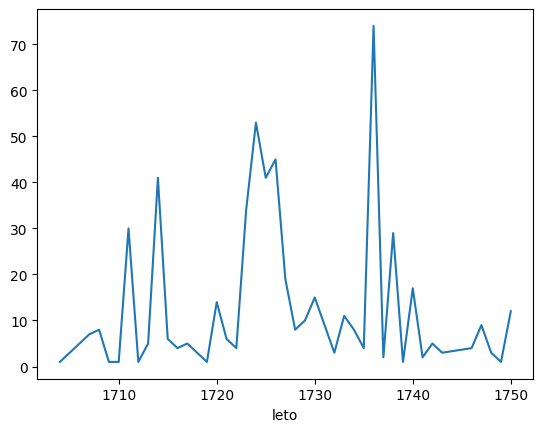

In [11]:
af.skladbe_na_leto()
af.modus_skladbe_na_leto()

Vidimo, da je 1736 njegovo najbolj produktivno leto. Takrat ga je Avgust III. Poljski imenoval za dvornega skladatelja in je med drugim pisal drugi zvezek dobro uglašenega klavirja. Večino so pa zaslužene pesmi ("lied", glas s spremljavo) za katere piše, da so nastale "pred aprilom 1736". Tu se vidi nenatančnost podatkov.  
Izstopa tudi leto 1723, ko je prevzel vlogo kapelnika v Leipzigu. Tista 3 leta tam je, poleg drugih kompozicij, vsak teden napisal eno kantato.  

Kako inštrumentalno obsežna pa so bila njegova dela? Večje, kompleksnejše skladbe kot so pasijoni, oratoriji ter maše, pričakujemo da bodo napisane v srednjih oz. poznih letih.

<Axes: xlabel='leto'>

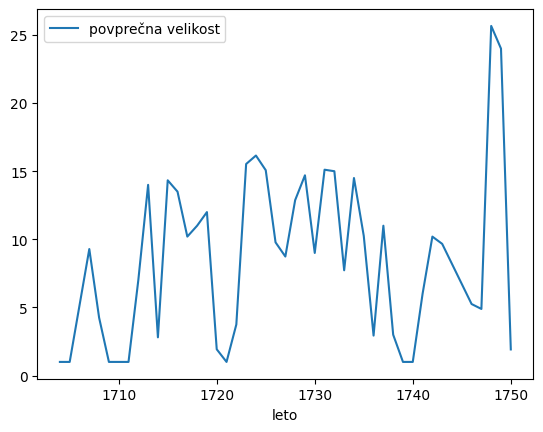

In [12]:
af.povprecna_velikost_zasedbe_po_letu()

Njegova srednja leta so videla zelo obsežne skladbe, kot je pasijon po Mateju. A v oči bode obdobje tik pred smrtjo, kar je s tako veliko zasedbo lahko samo maša v b-molu, eno njegovih najveličastnejših del, ki jo mnogi postavljajo na sam vrh glasbene umetnosti. V celoti izvedena je bila šele leta 1859, 110 let po njenem nastanku.

Tu se samo od sebe postavi vprašanje povezave med žanrom in velikostjo zasedbe. Pasijon verjetno zahteva več glasbenikov kot skladba za solo klavir.

,povprečje
zanr,
Aria,4.000000
Cantata,12.000000
Chorale,4.151832
Chorale cantata,16.169492
Chorale setting,1.000000
Lied,2.000000
Magnificat,25.000000
Mass,14.307692
Motet,8.250000


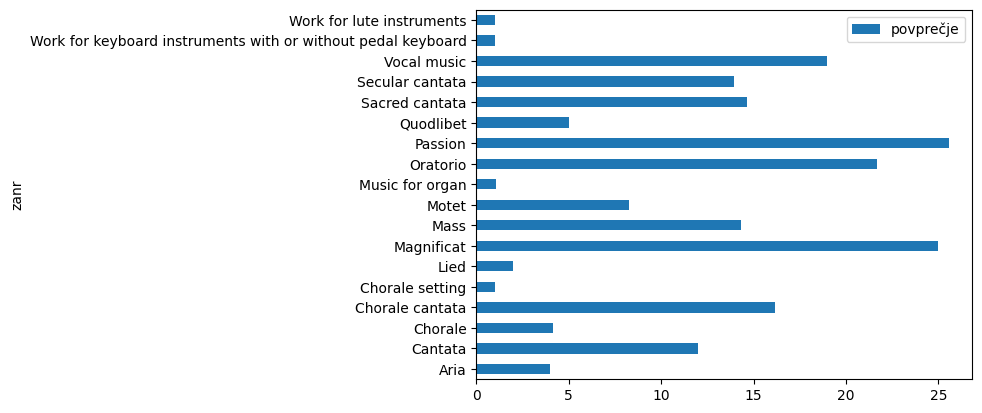

In [13]:
af.povprecna_velikost_zasedbe_po_zanru_plot()
af.povprecna_velikost_zasedbe_po_zanru()

Pasijon ima največjo povprečno zasedbo, mnogo večjo kot delo za inštrumente s tipkami. Pričakovanja so bila pravilna.  
Vidimo tudi, da maša nima v povprečju tako obsežne zasedbe. Maša v b-molu je potemtakem izjema.  
Magnifikat je Marijina hvalnica. Bach je napisal samo 2 in to z zborom, orkestrom in solisti, zato izstopa.

Skladba z največjo zasedbo je naslednja:

In [14]:
af.skladba_najvecja_zasedba()

,naslov,zasedba,velikost
sifra,,,
304,St. Matthew passion (Neufassung),"Soprano solo, Soprano solo, Alto solo, Alto solo, Tenore solo, Tenore solo, Basso solo, Basso solo, Soprano, Soprano, Alto, Alto, Tenore, Tenore, Basso, Basso, Flauto traverso, Flauto traverso, Flauto traverso, Flauto traverso, Flauto dolce, Flauto dolce, Oboe, Oboe, Oboe, Oboe, Oboe d'amore, Oboe d'amore, Oboe d'amore, Oboe d'amore, Oboe da caccia, Oboe da caccia, Violino, Violino, Violino, Violino, Viola, Viola, Viola da gamba, Viola da gamba, Basso continuo, Basso continuo",42


Kljub temu, da je Matejev pasijon tehnično napisan za dva orkestra in zbora skupaj z solisti, je moderni simfonični orkester dvakrat številčnejši. To je posledica širšega trenda 18. in 19. stoletja, kjer se je orkester postopoma povečeval vse do 120 glasbenikov za nekatera dela Richarda Wagner in Gustava Mahlerja.

Če so bile zasedbe v Bachovem času toliko manjše, katere so potem njegove najpogostejše zasedbe?

In [15]:
af.modus_5_zasedb()

,count
zasedba,
Organo,305
Tastiera,220
"Soprano, Alto, Tenore, Basso",188
"Voce, Basso continuo",86
"Soprano solo, Alto solo, Tenore solo, Basso solo, Soprano, Alto, Tenore, Basso, Oboe, Oboe, Violino, Violino, Viola, Basso continuo",8
"Soprano solo, Alto solo, Tenore solo, Basso solo, Soprano, Alto, Tenore, Basso, Oboe d'amore, Oboe d'amore, Violino, Violino, Viola, Basso continuo",6


Kot smo že rekli je bil Bach poklicno tudi organist in to se naravno prevede na splošno klaviaturo (Tastiera) npr. čembalo ali klavikord.  
Soprano, alto, tenor in bas je zelo pogosta zasedba za vokalno glasbo, pri bachu npr. korali. Bach uporablja isto zasedbo tudi za nekatera inštrumentalna dela npr. umetnost fuge (*Die Kunst der Fuge*).  
Glas in generalbas (Basso continuo) je zasedba vseh njegovih pesmi.  
Zadnji dve zasedbi se nanašata na razne kantate, ki so vokalno-inštrumentalne.

Vidimo, da se nekatera glasbila pojavijo v večih zasedbah. Soprano je v treh od petih najpogostejših zasedbah. Dajmo to splošno opredeliti:

,pojavitve
Violino,594
Soprano,481
Basso,476
Alto,471
Tenore,471
...,...
Campanelle,1
Violini,1
Oboi,1
Tromba (Clarino),1


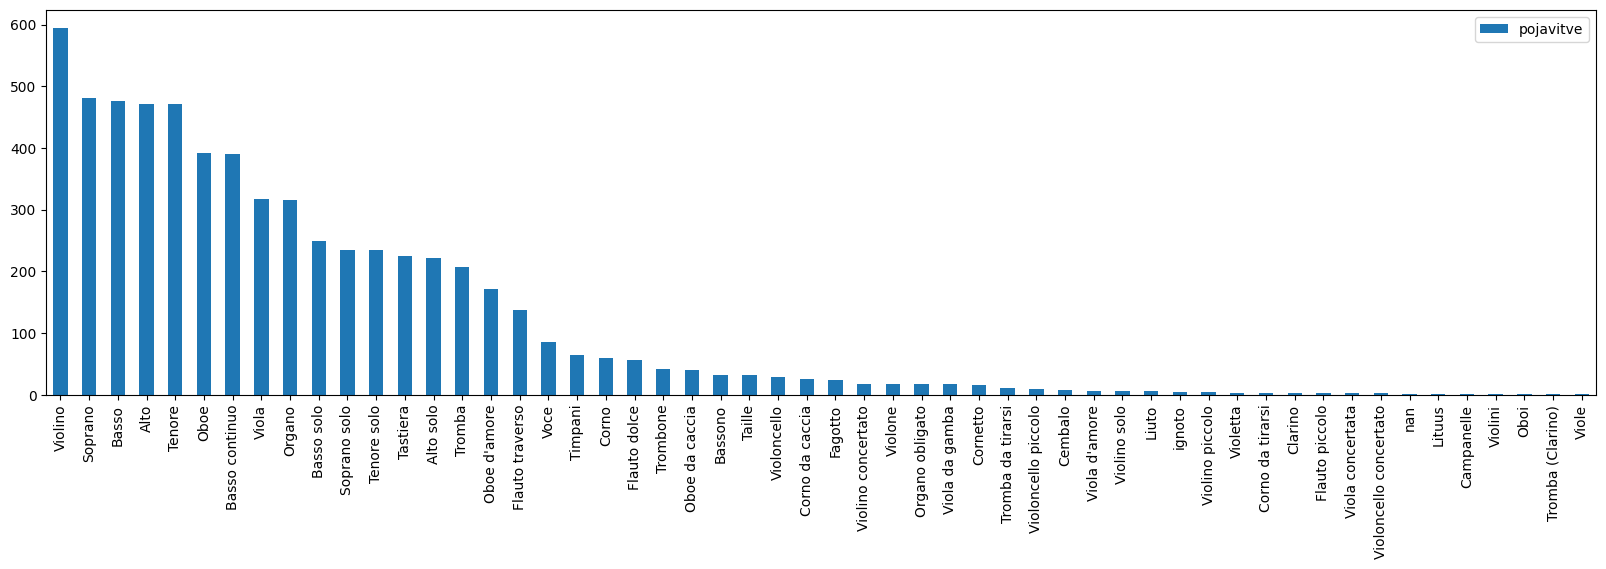

In [16]:
af.posamezna_glasbila_pojavitve_plot()
af.posamezna_glasbila_pojavitve()

Violina je najvišji inštrument med godali, soprano pa med glasovi. Glavno melodijo ponavadi igrajo taka glasbila, saj lažje slišimo visoke tone kot nižje. 

Kot smo že omenili, je Bach veliko preurejal in ponovno uporabljal svoja dela. Maša v b-molu je deloma sestavljena iz raznih prejšnih del. Tako BWV katalog vsebuje tudi podatek, kje drugje se skladba pojavi, torej "je del" neke druge zbirke ali skladbe.

Poglejmo katere take povezave so najpogostejše:

In [17]:
af.najpogostejse_povezave()

povezave
BWV 439-507                  69
BWV diverse [1. Jg.]         57
BWV 599-644                  48
BWV 846-869                  48
BWV diverse [2. Jg.]         41
BWV diverse [3. Jg.]         32
BWV 772-801                  31
BWV diverse [o.Jg.]          29
BWV 552, 669-689, 802-805    26
BWV 870-893                  24
Name: count, dtype: int64

BWV 439-507 je zbirka "Schemellijeva pesmarica" (*Schemellis Gesangbuch*), 1. Jg. (*Jahrgang 1*) je prvi cikel kantat iz Leipziga, BWV 599-644 pa zbirka *Orgel-Büchlein*.

To so največje zbirke 1998 izdaje *Bach-Werke-Verzeichnis*. 

Poglejmo še najbolj povezane skladbe, torej ki so del največ zbirk in drugih skladb:

In [18]:
af.skladbe_najvec_povezav()

Največ povezav: 6


,naslov,BWV
sifra,,
1035,Prelude and fugue (fughetta) in C (early version),870.1
1068,Prelude and fugue (fughetta) in d,899.0
1070,Prelude and fugue (fughetta) in F,901.0
1071,Prelude (new version) and fugue (fughetta) in G,902.2
1072,Prelude in G (early version),902.1


Za konec ostaneta zdaleč najbolj pomembna podatka: najdaljši in najkrajši naslov:

In [19]:
af.najdalsi_najkrajsi_naslov()

,naslov,dolžine
sifra,,
805,"Jesus Christus, unser Heiland, der von uns den Gotteszorn wand (à 2 Clav. et Ped., Canto fermo in Pedale)",105
668,"Trio, G",7
